In [1]:
from bs4 import BeautifulSoup
#from urllib2 import urlopen
import requests
import pandas as pd
import numpy as np
import re
from dateutil.parser import parse
from random import randint
from time import sleep
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from __future__ import division
import collections
from collections import Counter
from sklearn import grid_search, decomposition
import pickle
import json
import seaborn as sns
# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
worstbuilding = pd.read_pickle('worstbuilding.p')

In [3]:
fulllist = pd.read_pickle('fulllist_YearBuilt.p')

In [4]:
len(fulllist)

105990

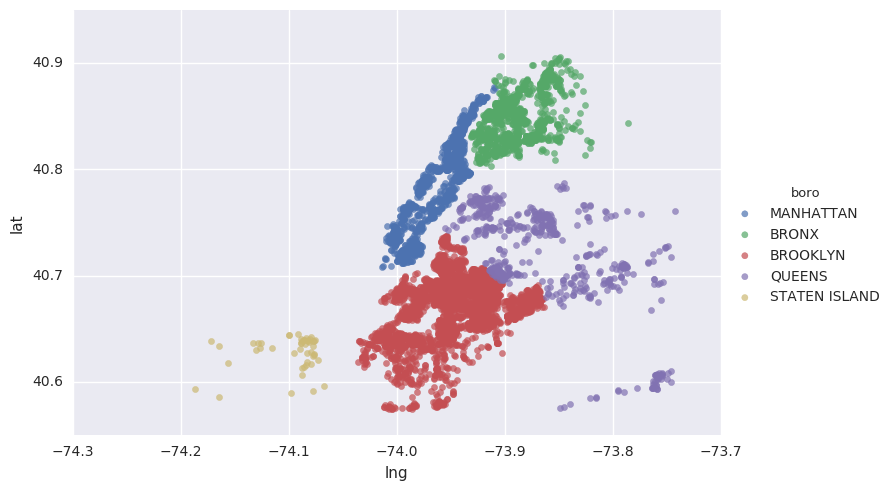

In [45]:
g = sns.FacetGrid(worstbuilding, hue="boro", size = 5, aspect = 1.5)
g.map(plt.scatter, "lng", "lat", alpha=.7);
g.add_legend();

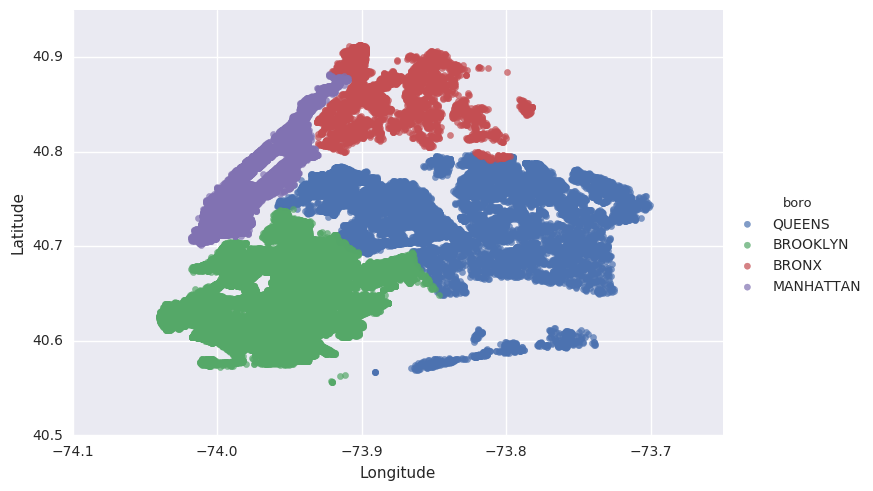

In [5]:
g = sns.FacetGrid(fulllist, hue="boro", size = 5, aspect = 1.5)
g.map(plt.scatter, "Longitude", "Latitude", alpha=.7);
g.add_legend();

In [49]:
b = fulllist.copy()

In [48]:
wl = worstbuilding.copy()


In [50]:
b['FullAdd'] = b['Address'] + ', ' + b['boro']

In [51]:
wl['FullAdd'] = wl['astr'] + ', ' + wl['boro']

In [56]:
wlist = pd.concat([wl['FullAdd'], pd.DataFrame(np.ones(len(wl)))], axis = 1)

In [81]:
trial = pd.merge(b, wlist, how= 'left', left_on= 'FullAdd', right_on= 'FullAdd')

In [99]:
b[b['Address'] == '1780 PITKIN AVENUE']

,Address,Neighborhood,YearBuilt,Latitude,Longitude,boro,postal,FullAdd


In [75]:
wlist.loc[1]['FullAdd']

'2075 WALLACE AVENUE, BRONX'

In [83]:
b.loc[77142]['FullAdd'] == wlist.loc[1]['FullAdd']

True

In [102]:
trial.columns = [     'Address', 'Neighborhood',    'YearBuilt',     'Latitude',
          'Longitude',         'boro',       'postal',      'FullAdd',
                    'WatchList']

In [130]:
NotList = trial[trial['WatchList'].isnull()]

In [131]:
IsList = trial[trial['WatchList']==1]

In [135]:
_, X, _, _ = train_test_split(NotList, NotList['boro'], stratify = NotList['boro'], test_size = 0.2)

In [149]:
NotList['WatchList']= 0

In [137]:
IsList['boro'].value_counts()

BROOKLYN     1206
MANHATTAN     537
QUEENS        125
BRONX         105
Name: boro, dtype: int64

In [147]:
testlist = pd.concat([X, IsList], ignore_index= True)

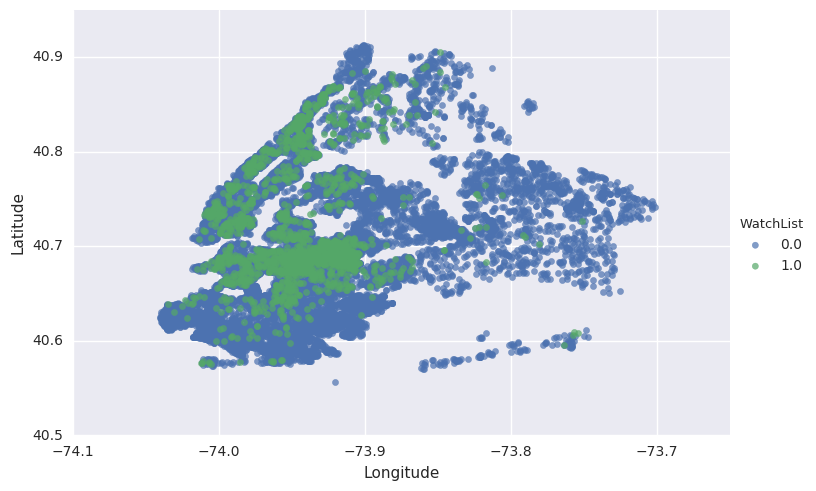

In [174]:
g = sns.FacetGrid(testlist, hue="WatchList", size = 5, aspect = 1.5)
g.map(plt.scatter, "Longitude", "Latitude", alpha=.7);
g.add_legend();

In [150]:
fulllist = pd.concat([IsList, NotList], ignore_index= True)

In [155]:
fulllist['boro'].value_counts()

BROOKLYN     57258
MANHATTAN    24138
QUEENS       20490
BRONX         4101
Name: boro, dtype: int64

In [254]:
fulllist.to_pickle('fulllist_RC.p')

In [157]:
testlist.to_pickle('testlist.p')

In [173]:
fulllist[fulllist['Address'] == '97 SHERMAN AVENUE']

,Address,Neighborhood,YearBuilt,Latitude,Longitude,boro,postal,FullAdd,WatchList
6039,97 SHERMAN AVENUE,Inwood,1930,40.8635,-73.9251,MANHATTAN,10034,"97 SHERMAN AVENUE, MANHATTAN",0.0


In [179]:
rentcontrol.head(1)

,borough,ucbbl,2007uc,2007est,2007dhcr,2007abat,2008uc,2008est,2008dhcr,2008abat,...,address,ownername,numbldgs,numfloors,unitsres,unitstotal,yearbuilt,condono,lon,lat
0,MN,1000160180,293.0,N,NaN,NaN,293.0,N,NaN,NaN,...,20 RIVER TERRACE,NaN,1.0,27.0,293.0,294.0,2002.0,0.0,-74.0161,40.7166


In [175]:
rentcontrol = pd.read_csv('RenControl.csv')

In [177]:
RCdf = pd.concat([rentcontrol['borough'], rentcontrol['address']], axis = 1)

In [180]:
RCdf = pd.concat([RCdf, rentcontrol['lon']], axis = 1)

In [181]:
RCdf = pd.concat([RCdf, rentcontrol['lat']], axis = 1)

In [184]:
RCdf = RCdf.dropna()

In [210]:
RCdf = RCdf.reset_index(drop=True)

In [187]:
RCdf.to_pickle('RentControldf.p')

In [190]:
RCdf = RCdf[RCdf['borough']!='SI']

In [217]:
RCdf.to_pickle('RentControldf.p')

In [204]:
man = RCdf[RCdf['borough']=='MN']
bro = RCdf[RCdf['borough']=='BK']
qn = RCdf[RCdf['borough']=='QN']
bx = RCdf[RCdf['borough']=='BX']

bx['borough'] = 'BRONX'

RCdf = pd.concat([man, bro])

RCdf = pd.concat([RCdf, qn])

RCdf = pd.concat([RCdf, bx])

In [212]:
len(RCdf)

44401

In [215]:
RCdf['FullAdd'] = RCdf['address'] + ', ' + RCdf['borough']

In [218]:
RCdf['RC'] = 1

In [147]:
fulllist

,Address,Neighborhood,YearBuilt,Latitude,Longitude,boro,postal,FullAdd,WatchList,RC,geoID
0,179 WOODWARD AVENUE,Ridgewood,1931.0,40.7119,-73.9171,QUEENS,11385,"179 WOODWARD AVENUE, QUEENS",1.0,1.0,36081053900
1,926 PROSPECT PLACE,Crown Heights,1905.0,40.6739,-73.9460,BROOKLYN,11213,"926 PROSPECT PLACE, BROOKLYN",1.0,1.0,36047034100
2,459 EAST 135 STREET,North New York,1931.0,40.8065,-73.9221,BRONX,10454,"459 EAST 135 STREET, BRONX",1.0,1.0,36005002500
3,1545 WHITE PLAINS ROAD,Parkchester,1963.0,40.8391,-73.8641,BRONX,10460,"1545 WHITE PLAINS ROAD, BRONX",1.0,1.0,36005021601
4,90 STARR STREET,Bushwick,1931.0,40.7020,-73.9259,BROOKLYN,11237,"90 STARR STREET, BROOKLYN",1.0,1.0,36047042700
5,73 MONROE STREET,Two Bridges,1910.0,40.7118,-73.9927,MANHATTAN,10002,"73 MONROE STREET, MANHATTAN",1.0,1.0,36061000800
6,304 SCHAEFER STREET,Bushwick,1906.0,40.6928,-73.9045,BROOKLYN,11237,"304 SCHAEFER STREET, BROOKLYN",1.0,1.0,36047040900
7,354 EAST 78 STREET,Upper East Side,1910.0,40.7717,-73.9539,MANHATTAN,10075,"354 EAST 78 STREET, MANHATTAN",1.0,1.0,36061013400
8,303 AMSTERDAM AVENUE,Upper West Side,1900.0,40.7800,-73.9803,MANHATTAN,10023,"303 AMSTERDAM AVENUE, MANHATTAN",1.0,1.0,36061015700
9,170 WEST 109 STREET,Manhattan Valley,1910.0,40.8020,-73.9638,MANHATTAN,10025,"170 WEST 109 STREET, MANHATTAN",1.0,1.0,36061019300


In [234]:
foo = pd.merge(fulllist, bahhh, how= 'left', left_on= 'FullAdd', right_on= 'FullAdd')

In [232]:
bahhh = pd.concat([RCdf['FullAdd'], RCdf['RC']], axis = 1)

In [238]:
f = foo[foo['RC']==1]

In [239]:
g = foo[foo['RC']!=1]

In [243]:
len(f)+len(g)

105990

In [245]:
g['RC'] = 0

In [242]:
len(fulllist)

105987

In [248]:
len(f[f['WatchList'] ==1])

977

In [249]:
flist = pd.concat([f, g])

In [253]:
fulllist = flist.reset_index(drop = True)

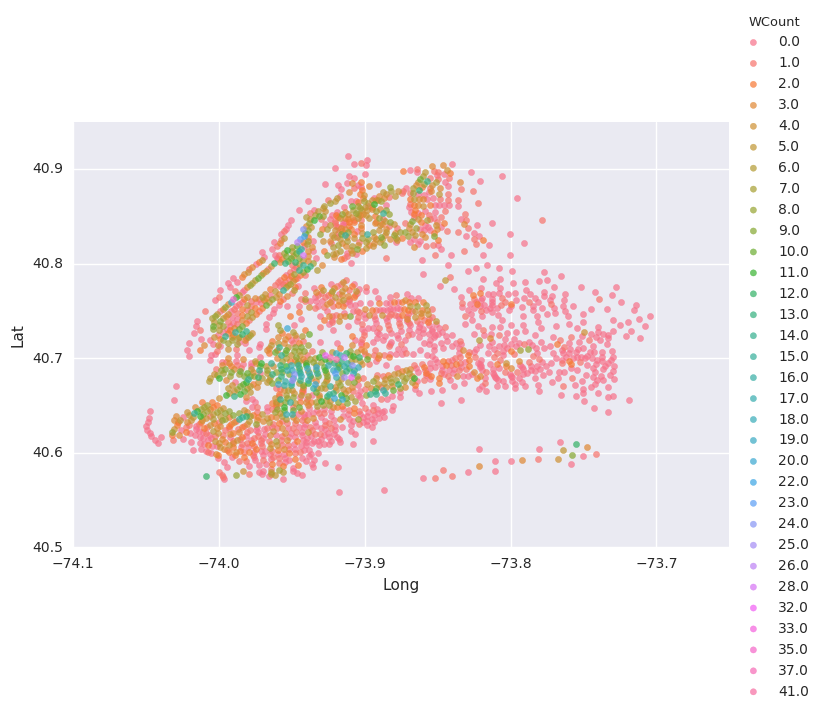

In [152]:
g = sns.FacetGrid(master, hue="WCount", size = 5, aspect = 1.5)
g.map(plt.scatter, "Long", "Lat", alpha=.7);
g.add_legend();

In [30]:
censusdict = pd.read_csv('2010_gaz_tracts.txt', sep= '\t')

In [14]:
flist = pd.read_pickle('fulllist_RC.p')

In [27]:
X = pd.concat([censusdict['INTPTLAT'], censusdict['INTPTLONG']], axis = 1)

y = censusdict['GEOID']

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 1)

model.fit(X, y)

Xflist = pd.concat([worstbuilding['lat'], worstbuilding['lng']], axis = 1)

yflist = model.predict(Xflist)

worstbuilding['geoID'] = yflist

In [79]:
flist['YearBuilt'] = flist['YearBuilt'].astype(float)

In [102]:
flist.groupby('RC')['YearBuilt'].mean()

RC
0.0    1928.449192
1.0    1925.479775
Name: YearBuilt, dtype: float64

In [91]:
RCyes = flist[flist['RC'] == 1]

RCyes.ix[RCyes.YearBuilt == np.nan, 'YearBuilt'] = 1924

In [94]:
RCno = flist[flist['RC'] == 0]

RCno.ix[RCno.YearBuilt == np.nan, 'YearBuilt'] = 1921

In [95]:
flist = pd.concat([RCyes, RCno])

In [9]:
TractYB = pd.DataFrame(fulllist.groupby('geoID', as_index=False)['YearBuilt'].mean())

In [19]:
TractRC =pd.DataFrame(fulllist.groupby('geoID', as_index=False)['RC'].mean())

In [42]:
worstbuilding = worstbuilding[worstbuilding['boro']!= 'STATEN ISLAND']

In [63]:
Tract_worst = pd.DataFrame(worstbuilding.groupby('geoID', as_index=False).size())

In [58]:
Tract_worst = pd.DataFrame(Tract_worst)

In [7]:
censusdict = pd.read_pickle('censusdict.p')

In [21]:
rentcontrol = pd.read_csv('RenControl.csv')

In [104]:
worstlist = pd.read_pickle('worstbuilding.p')

In [10]:
census = pd.concat([censusdict['GEOID'], censusdict['INTPTLAT']], axis = 1)
census = pd.concat([census, censusdict['INTPTLONG']], axis = 1)

In [11]:
master = pd.merge(TractYB, census, how = 'inner', left_on = 'geoID', right_on = 'GEOID')

In [13]:
master =master.drop('GEOID', axis = 1)

In [21]:
master = pd.concat([master, TractRC], axis = 1)

In [14]:
master.columns = ['geoID', 'YearBuilt', 'Lat', 'Long']

In [103]:
flist.to_pickle('fulllist_YearBuilt.p')

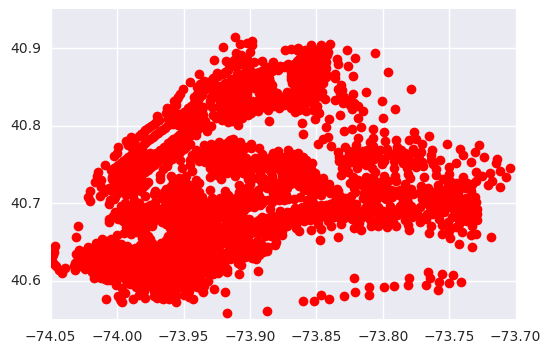

In [18]:
plt.plot(master['Long'], master['Lat'], 'ro')

In [53]:
master['TotalB'] = list(fulllist.groupby('geoID').size())

In [89]:
moo = pd.merge(master, Tract_worst, how = 'left', left_on='geoID', right_on = 'geoID')

In [65]:
Tract_worst = Tract_worst.reset_index()

In [67]:
Tract_worst.columns = ['geoID', 'WCount']

In [82]:
master.columns = ['geoID', 'YearBuilt', 'Lat', 'Long', 'geoID2', 'RC', 'TotalB']

In [84]:
master = master.drop('geoID2', axis = 1)

In [92]:
moo['WCount'].value_counts()

1.0     297
2.0     179
3.0     162
4.0     111
5.0      86
6.0      63
7.0      63
8.0      48
9.0      35
10.0     35
11.0     23
13.0     20
14.0     18
12.0     16
15.0      9
16.0      8
17.0      7
18.0      6
19.0      4
20.0      4
24.0      3
23.0      2
25.0      2
26.0      2
37.0      1
22.0      1
28.0      1
32.0      1
33.0      1
35.0      1
41.0      1
Name: WCount, dtype: int64

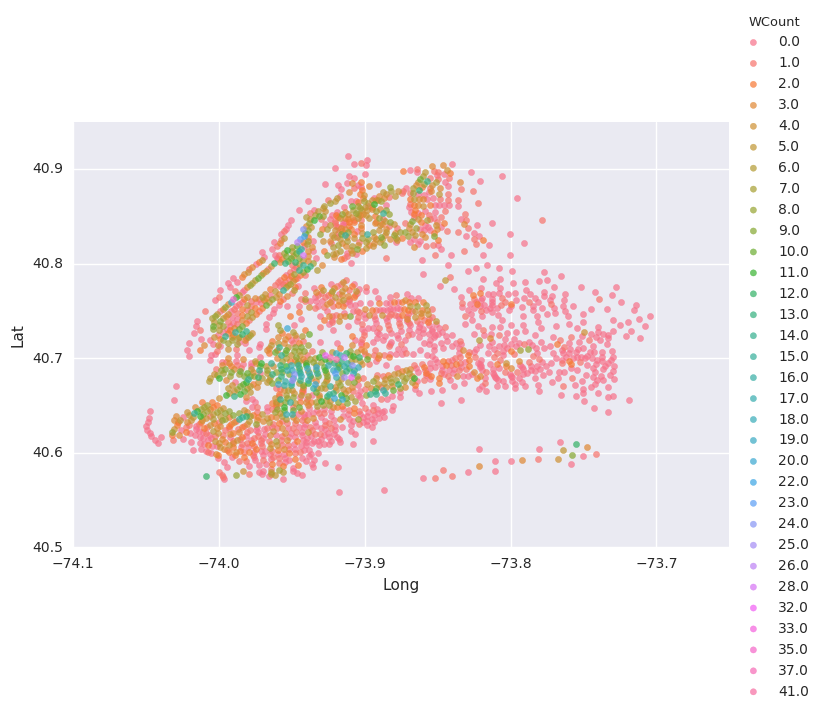

In [121]:
g = sns.FacetGrid(moo, hue="WCount", size = 5, aspect = 1.5)
g.map(plt.scatter, "Long", "Lat", alpha=.7);
g.add_legend();

In [93]:
master = moo

In [95]:
master.to_pickle('master_WC.p')

In [118]:
master.ix[pd.isnull(master.WCount), 'WCount'] = 0

In [113]:
master['WCount'][0]

nan

In [123]:
master['Wratio'] = master['WCount']/master['TotalB']

In [135]:
master.ix[master.Wratio> 1, 'Wratio'] = 1

In [141]:
master.to_pickle('master_WR.p')

In [142]:
master[master['geoID'] == 36005002500]

,geoID,YearBuilt,Lat,Long,RC,TotalB,WCount,Wratio
6,36005002500,1919.4,40.807003,-73.920875,0.24,25,3.0,0.12


In [143]:
365*6

2190

In [145]:
master.to_csv('masterlist.csv')

In [149]:
master['WCount'].value_counts()

0.0     801
1.0     297
2.0     179
3.0     162
4.0     111
5.0      86
6.0      63
7.0      63
8.0      48
9.0      35
10.0     35
11.0     23
13.0     20
14.0     18
12.0     16
15.0      9
16.0      8
17.0      7
18.0      6
19.0      4
20.0      4
24.0      3
23.0      2
25.0      2
26.0      2
37.0      1
22.0      1
28.0      1
32.0      1
33.0      1
35.0      1
41.0      1
Name: WCount, dtype: int64

In [151]:
len(master)

2011

In [156]:
sample = pd.concat([master.geoID, master.Wratio], axis =1)

In [160]:
sample.to_csv('sample.tsv', sep = '\t', index=False)